# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'
metric = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={metric}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | lihue
Processing Record 3 of Set 1 | ancud
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | ijuw
City not found. Skipping...
Processing Record 8 of Set 1 | casper
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | mont-tremblant
Processing Record 11 of Set 1 | kapit
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | maffra
Processing Record 14 of Set 1 | karratha
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | egilsstadir
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | kingston
Processing Record 20 of Set 1 | weno
Processing Record 21 of Set 1 | awjilah
Processing Record 22 of Set 1 | bhamo
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,7.12,89,73,4.47,NZ,1691014124
1,lihue,21.9789,-159.3672,30.77,66,20,7.72,US,1691014125
2,ancud,-41.8697,-73.8203,6.00,66,26,3.30,CL,1691014125
3,olonkinbyen,70.9221,-8.7187,6.11,88,50,2.33,SJ,1691014126
4,papatowai,-46.5619,169.4708,7.07,91,100,4.34,NZ,1691014126


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,7.12,89,73,4.47,NZ,1691014124
1,lihue,21.9789,-159.3672,30.77,66,20,7.72,US,1691014125
2,ancud,-41.8697,-73.8203,6.00,66,26,3.30,CL,1691014125
3,olonkinbyen,70.9221,-8.7187,6.11,88,50,2.33,SJ,1691014126
4,papatowai,-46.5619,169.4708,7.07,91,100,4.34,NZ,1691014126


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

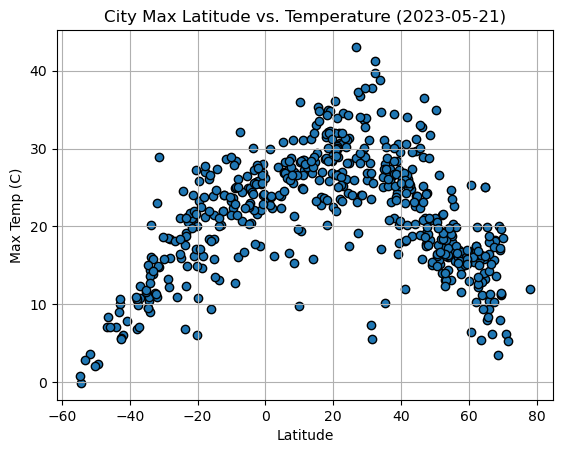

In [15]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']

plt.scatter(x,y, marker='o', edgecolors='black')

# Incorporate the other graph properties

plt.title("City Max Latitude vs. Temperature (2023-08-02)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

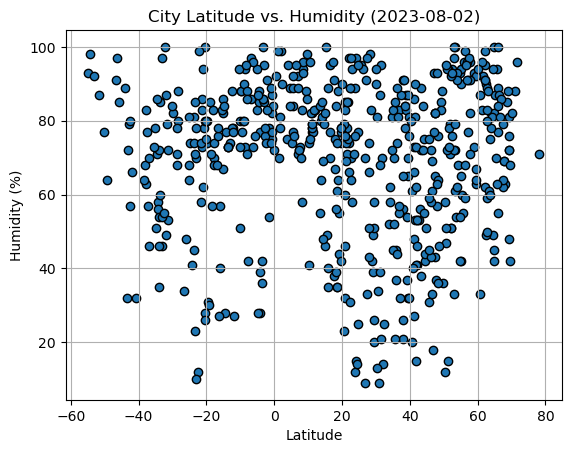

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-08-02)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

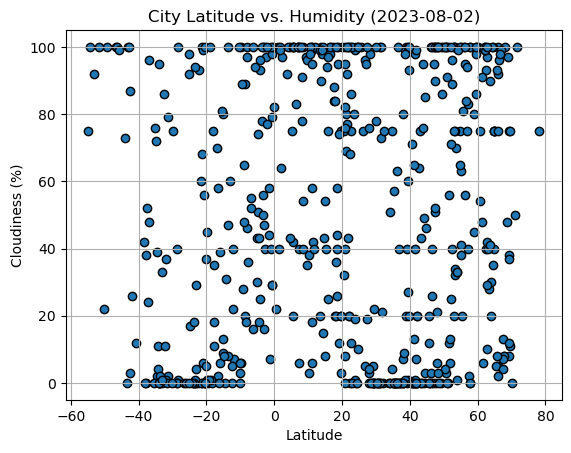

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-08-02)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

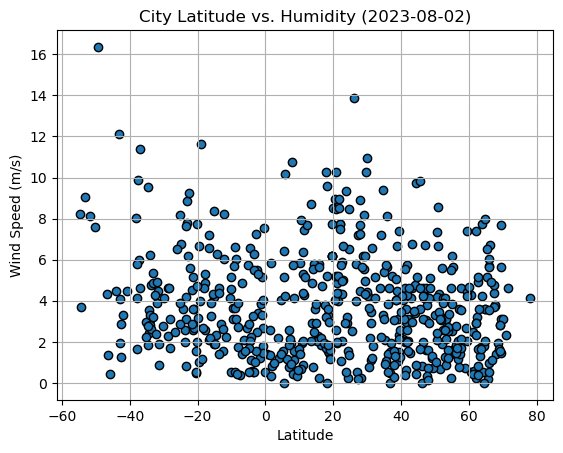

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-08-02)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.drop(city_data_df[city_data_df["Lat"]<=0].index)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lihue,21.9789,-159.3672,30.77,66,20,7.72,US,1691014125
3,olonkinbyen,70.9221,-8.7187,6.11,88,50,2.33,SJ,1691014126
5,longyearbyen,78.2186,15.6401,11.91,71,75,4.12,SJ,1691014127
6,casper,42.8666,-106.3131,24.84,56,75,4.12,US,1691014128
8,mont-tremblant,46.1949,-74.6264,15.76,72,100,0.82,CA,1691014051


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.drop(city_data_df[city_data_df["Lat"]>=0].index)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,7.12,89,73,4.47,NZ,1691014124
2,ancud,-41.8697,-73.8203,6.00,66,26,3.30,CL,1691014125
4,papatowai,-46.5619,169.4708,7.07,91,100,4.34,NZ,1691014126
7,adamstown,-25.0660,-130.1015,21.11,68,92,8.18,PN,1691014128
11,maffra,-37.9667,146.9833,6.82,83,0,1.65,AU,1691014130


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6369563623053893


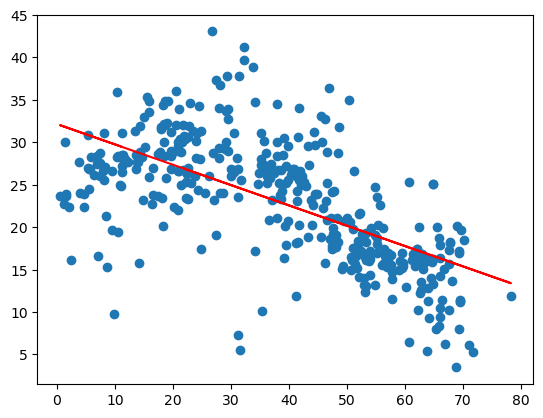

In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq =  "y = " +str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values, regress_values, "r-")
plt.xlabel = 'Latitude'
plt.ylabel = 'Max Temp'
plt.annotate(line_eq, (0,0), fontsize = 15, color="red")
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.4121057168607245


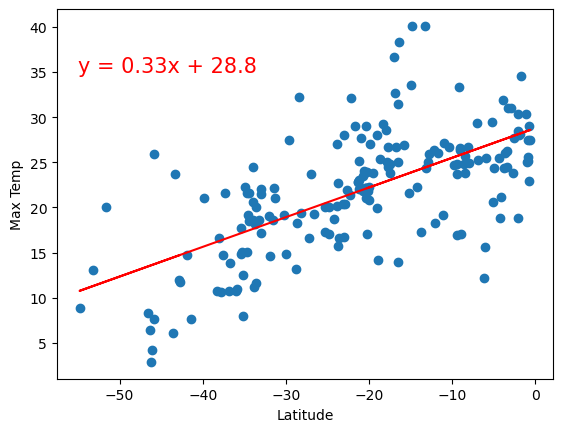

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


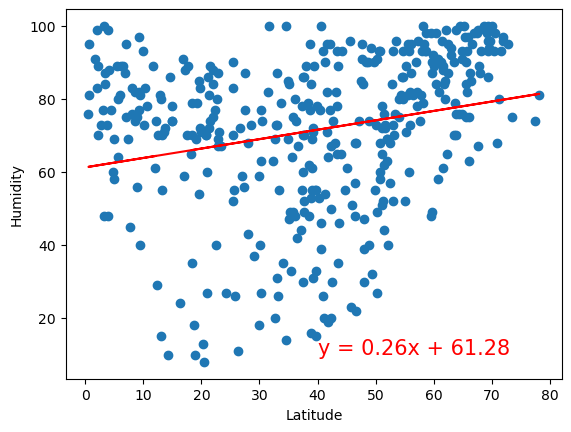

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


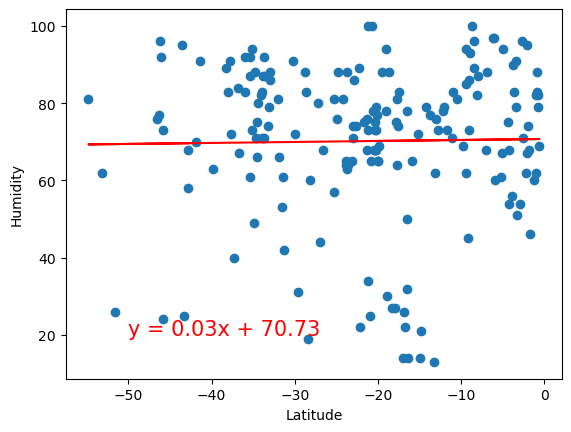

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


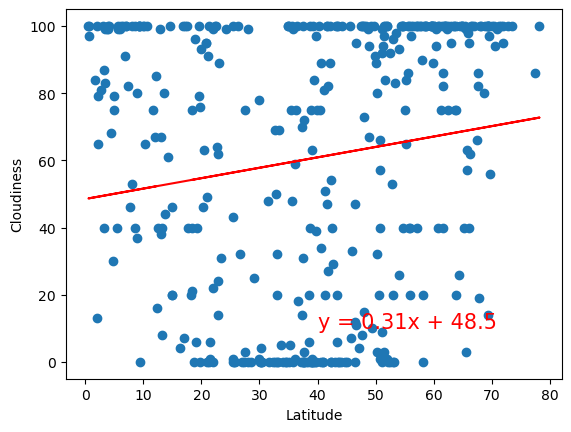

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


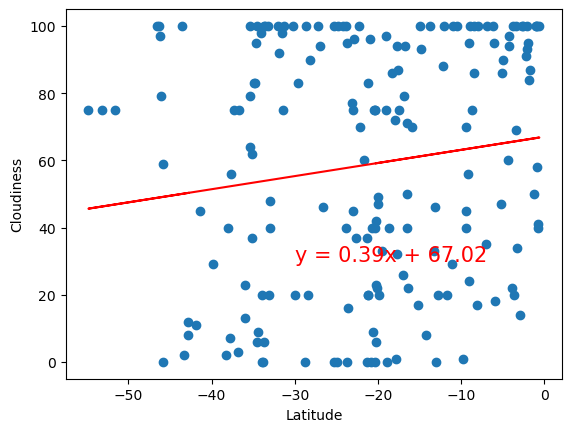

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


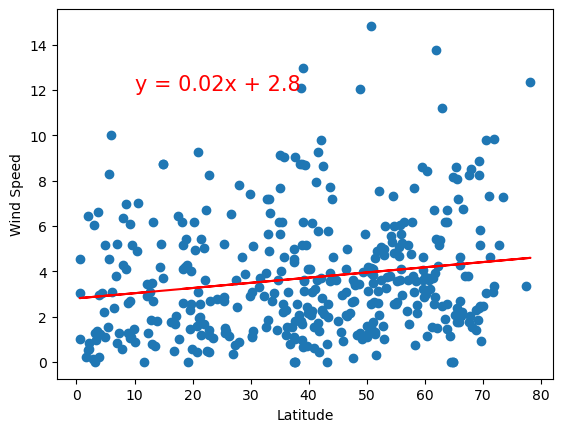

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


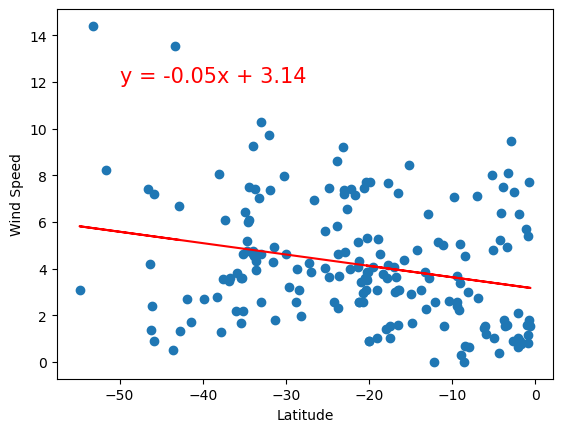

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE